<a href="https://colab.research.google.com/github/sanyamja1n/Zomato-Restaurant-Clustering/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering & Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** Sanyam Jain
##### **Team Member 2 -** Yaseer Khan
##### **Team Member 3 -** Yaser Zaidi
##### **Team Member 4 -** Shraddha Shandilya
##### **Team Member 5 -** Abhishek Bhargava

# **Project Summary -**

This project entailed the utilization of advanced data analytics techniques to gain a deeper understanding of the restaurants and customer feedback on the online food delivery platform, Zomato.

The data procured included information such as the restaurant's name, cuisines, ratings, and user reviews.

Subsequently, we embarked on the task of data cleaning and preprocessing, which involved the elimination of duplicate entries, addressing missing values, and transforming the data into a format amenable to analysis.

The next step was the implementation of clustering on the restaurant data through the use of the k-means algorithm. The number of clusters was determined by elbow method.

We then proceeded to conduct sentiment analysis on the user reviews to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were utilized to classify the reviews as positive, negative, or neutral.

# **GitHub Link -**

https://github.com/sanyamja1n/Zomato-Restaurant-Clustering

# **Problem Statement**


The problem statement for this project is to analyze and understand the restaurant industry in India by utilizing data from the Zomato. The project aims to gain insights into the sentiments of customer reviews, cluster Zomato restaurants, and analyze the data to make useful conclusions in the form of visualizations. Additionally, the project aims to use the data for sentiment analysis and identifying critics in the industry through the metadata of reviewers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import spacy

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import time

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px
import re
import string
!pip install contractions
import contractions
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords


from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
#Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Loading the data
meta_df = pd.read_csv('/content/drive/MyDrive/Sample Data/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Sample Data/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look
meta_df.head()

In [ ]:
reviews_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
meta_df.shape

In [ ]:
reviews_df.shape

### Dataset Information

In [ ]:
# Dataset Info
meta_df.info()

In [ ]:
reviews_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
meta_df.duplicated().sum()

In [ ]:
reviews_df.duplicated().sum()

In [ ]:
#Dropping Duplicates
reviews_df.drop_duplicates(inplace = True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
meta_df.isnull().sum() # Checking null values

In [ ]:
#Since more than 50% of the collection column data is missing so we will drop this column
meta_df.drop('Collections', axis = 1, inplace = True)

In [ ]:
reviews_df.isnull().sum()

In [ ]:
# Removing the null value
reviews_df.dropna(inplace= True)

### What did you know about your dataset?

**Restaurant DataSet**
* There are 105 total observation with 6 different features.

* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.


**Review DataSet**
* There are total 10000 observation and 7 features.
* Except picture and restaurant feature all others have null values.
* There are total of 36 duplicate values.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
meta_df.columns

In [ ]:
reviews_df.columns

In [ ]:
# Dataset Describe
reviews_df.describe(include = 'all').T

In [ ]:
meta_df.describe()

In [ ]:
# checking for unique values in cost
meta_df.Cost.value_counts()

### Variables Description 

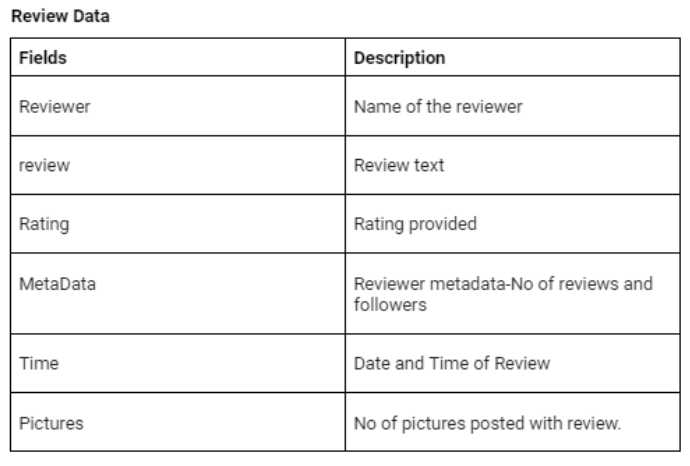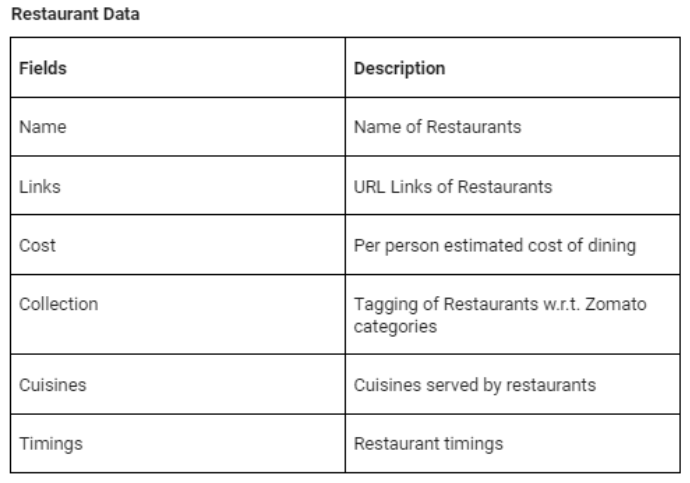

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
reviews_df.nunique()

In [ ]:
reviews_df['Rating'].value_counts()

In [ ]:
meta_df.nunique()

##  ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# changing the data type of the cost
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

In [ ]:
# remove the row with rating 'Like' as only 1 row has this value and then converting rating datatype to float
reviews_df = reviews_df[reviews_df['Rating'] !='Like']
reviews_df['Rating'] = reviews_df['Rating'].astype(float)

In [ ]:
#Splitting "Metadata" column into reviews and followers column
reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [ ]:
#Converting "Time" column datatype to datetime and then extracting Year, month, day and hour from it
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Day'] = pd.DatetimeIndex(reviews_df['Time']).day
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [ ]:
#checking for null values
reviews_df.isna().sum()

In [ ]:
# filling the nan values of followers by 0
reviews_df['Followers'].fillna(0,inplace=True)

In [ ]:
# Making list of cuisine
cuisine_list=meta_df.Cuisines.str.split(', ')
cuisine_list

In [ ]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1 

In [ ]:
cuis_dict

In [ ]:
# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'}).sort_values('Number of Restaurants', ascending= False)

In [ ]:
cuis_df

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Most Expensive Restaurant

In [ ]:
# checking most expensive
plt.figure(figsize = (12,5))
sns.barplot(data = meta_df.sort_values(by = 'Cost',ascending = False)[:15], 
            y= 'Name', 
            x= 'Cost' )
plt.title('15 Most Expensive restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

To check top 15 most expensive restaurant.

##### 2. What is/are the insight(s) found from the chart?

Collage - Hyatt Hyderabad Gachibowli is the most expensive restaurant followed by Feast - Sheraton Hyderabad Hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 2 Most Affordable Restaurant

In [ ]:
# checking  most afforatble Resturent
plt.figure(figsize = (12,5))
sns.barplot(data = meta_df.sort_values(by = 'Cost',ascending = False)[-15:], 
            y= 'Name', 
            x= 'Cost' )
plt.title('15 Most Affortable Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

To check top 15 most affordable restaurant.

##### 2. What is/are the insight(s) found from the chart?

Amul is the most affordable restaurant.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 3 Rating Count

In [ ]:
sns.countplot(reviews_df.Rating)
plt.title('Rating count')
plt.show()

##### 1. Why did you pick the specific chart?

To check the rating count.

##### 2. What is/are the insight(s) found from the chart?

Most of the reviews are 5 rated followed by 4 and then 1.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 4 Highest Rated Restaurants

In [ ]:
# Restaurant with highest avg ratings
sns.barplot(data = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by= 'Rating', ascending = False)[:10],
            y = 'Restaurant', 
            x = 'Rating')
plt.title('Restaurant with highest ratings')
plt.show()

##### 1. Why did you pick the specific chart?

To check top 10 highest rated restaurant.

##### 2. What is/are the insight(s) found from the chart?

AB's - Absolute Barbecues is the highest rated restaurant.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 5 Worst Rated Restaurant 

In [ ]:
# Restaurant with lowest avg ratings
sns.barplot(data = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by= 'Rating', ascending = False)[-10:],
            y = 'Restaurant', x = 'Rating')
plt.title('Restaurant with lowest ratings')
plt.show()

##### 1. Why did you pick the specific chart?

To check lowest rated restaurant.

##### 2. What is/are the insight(s) found from the chart?

Hotel Zara Hi-Fi is the lowest rated restaurant followed by Asian Meal Box.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 6 Top Reviewers by no. of reviews

In [ ]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews': 'sum', 'Followers':'sum', 'Rating': 'mean'}).reset_index()

# Top 15 reviewers by review count
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')
plt.show()


##### 1. Why did you pick the specific chart?

To check top 15 Reviewers by no. of reviews.

##### 2. What is/are the insight(s) found from the chart?

Anvesh Chowdary has highest no. of reviews followed by Raghu.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 7 Top reviewers by no. of followers

In [ ]:
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Followers')
plt.show()

##### 1. Why did you pick the specific chart?

To check top 15 Reviewers by no. of followers.

##### 2. What is/are the insight(s) found from the chart?

Satwinder Singh has most no. of followers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 8 Reviews Count wrt Time

In [ ]:
# Hist plot on Time columns
plt.figure(figsize = (12,7))
sns.histplot(reviews_df.Time)
plt.title('Reviews count w.r.t Time')
plt.show()

##### 1. Why did you pick the specific chart?

To check review count distribution over time.

##### 2. What is/are the insight(s) found from the chart?

No. of reviews got increament after May, 2018.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 9 Most Selling Cuisine

In [ ]:
data = cuis_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:5]

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =15, color= 'black')
plt.show()

##### 1. Why did you pick the specific chart?

To check top 5 most selling cuisines using pie chart.

##### 2. What is/are the insight(s) found from the chart?

North Indian food is in most demand followed by Chinese.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 10 WordCloud of Cuisine

In [ ]:
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuis_df.Cuisine )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

To analyze the most demanding cuisine with word cloud.

##### 2. What is/are the insight(s) found from the chart?

From the above word cloud we can see most frequent keywords in bold.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 11 Correlation Heatmap

In [ ]:
#merging both data frame
meta1 = meta_df.rename(columns = {'Name':'Restaurant'})
merged = meta1.merge(reviews_df, on = 'Restaurant')
merged.shape

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(merged.corr(), annot=True, cmap = 'coolwarm')

plt.show()

##### 1. Why did you pick the specific chart?

To check correlation between features.

##### 2. What is/are the insight(s) found from the chart?

* Reviews is 47% correlated with followers
* Followers and Reviews is also positively correlated with photos.
* Year and Cost is 25% correlated which may be due to inflation.

#### Chart - 12 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(merged)

## ***5. Feature Engineering & Data Pre-processing***

### 1.Feature Creation

In [ ]:
cuisine_df = meta_df[['Name','Cost','Cuisines']]

In [ ]:
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].apply(lambda x: x.lower())

In [ ]:
cuisine_df.head()

In [ ]:
# function for spliting the cuisine and storing in list 
def cuisine_list(cuisines):
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [ ]:
# Spliting the cuisine and storing in list
cuisine_df['cuisine']=cuisine_df['Cuisines'].apply(lambda x : cuisine_list(x))

In [ ]:
cuisine_df.head()

In [ ]:
# Transform each element of a list-like to a row 
cuisine_df=cuisine_df.explode('cuisine')
cuisine_df

In [ ]:
# checking unique values of cuisine
set(cuisine_df["cuisine"])

In [ ]:
cuisine_df["cuisine"].nunique()

Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert

In [ ]:
# Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert
l=[]
for i in cuisine_df['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

In [ ]:
# updating the data frame with cuisines superset
superset_cuisine=pd.DataFrame(l)
superset_cuisine.columns=['cuisine']
superset_cuisine

In [ ]:
superset_cuisine.value_counts()

In [ ]:
# droping the cuisine feature and creating new data frame with cuisine superset
cuisine_df.reset_index(inplace=True)
cuisine_df.drop(['cuisine'],axis=1,inplace=True)
dataset=pd.concat([cuisine_df,superset_cuisine],axis=1)

In [ ]:
dataset.head()

In [ ]:
dataset.drop(['index'],axis=1,inplace=True)

###  2. Categorical Encoding

In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(dataset, columns=["cuisine"],prefix=None)

In [ ]:
cuisine= ['cuisine_Dessert',
        'cuisine_Healthy food',
        'cuisine_spicy food',
         'cuisine_fast food']

In [ ]:
cluster_df=dum_df.groupby(['Name','Cost','Cuisines'])[cuisine].sum().reset_index()

In [ ]:
cluster_data=cluster_df.drop(['Name','Cuisines'],axis=1)

In [ ]:
cluster_data.head()

## Standardizing each of the features in the clusters

In [ ]:
# Scaling the data
sc = StandardScaler()
cluster_data_sc = sc.fit_transform(cluster_data)
cluster_data_sc

## KMEANS

In [ ]:
# finding best cluster bu error rate
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cluster_data_sc)
    sse.append(km.inertia_)

 ## Using Elbow Analysis determining optimal number of clusters

In [ ]:
# finding best clusters by error rate
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit_transform(cluster_data_sc)
    cluster_errors.append( clusters.inertia_ )

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [ ]:
plt.figure(figsize=(12,6))
sns.pointplot(x = clusters_df['num_clusters'], y = clusters_df['cluster_errors'])
plt.title('Sum of squares elbow plot')

##Finding optimum no. of cluster by silhouette score

In [ ]:
#finding best cluster by silhouette score
k_range = range(2, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_data_sc)
    scores.append(metrics.silhouette_score(cluster_data_sc, km.labels_))

In [ ]:
# plot the results
plt.figure(figsize=(12,6))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette score')

In [ ]:
X=cluster_data_sc

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From silhouttee coefficients we are getting 3 as our optimum number of clusters

In [ ]:
# Finding the predicted values by kmeans
km = KMeans(n_clusters= 3, n_init= 1000, random_state = 1 )
y_predicted = km.fit_predict(cluster_data_sc)

In [ ]:
pd.Series(km.labels_).value_counts()

In [ ]:
cluster_df['cluster']=y_predicted

In [ ]:
cluster_df

In [ ]:
# ploting average cost of each cluster
pd.DataFrame(cluster_df.groupby('cluster')['Cost'].mean()).plot(kind="bar")
plt.title('average cost of each cluster')
plt.show()

## Hierarchical Clustering

In [ ]:
#Dendogram Plotting
plt.figure(figsize= (15,7))
dendrogram = sch.dendrogram(sch.linkage(cluster_data_sc, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
#Agglomerative Clustering with no. of clusters = 3
hc = AgglomerativeClustering(n_clusters = 3)
y_hc = hc.fit_predict(cluster_data_sc)

In [ ]:
cluster_df['cluster_hr']=y_hc

In [ ]:
clustering_result = cluster_df.loc[:,['Name','Cost','Cuisines','cluster','cluster_hr']]
clustering_result.head()

In [ ]:
# ploting average cost of each cluster
pd.DataFrame(cluster_df.groupby('cluster_hr')['Cost'].mean()).plot(kind="bar")
plt.title('average cost of each cluster')
plt.show()

### 3. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
review_df = reviews_df.reset_index(drop= True)[['Reviewer','Restaurant','Rating','Review']]

In [ ]:
#Create a function to get the subjectivity and polarity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [ ]:
#Create two new columns
review_df['Subjectivity'] = review_df['Review'].apply(subjectivity)
review_df['Polarity'] = review_df['Review'].apply(polarity)

In [ ]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
# Applying getAnalysis to review_df['Analysis']
review_df['Analysis'] = review_df['Polarity'].apply(getAnalysis)

In [ ]:
# plot the polarity and subjectivity
fig = px.scatter(review_df, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')
#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

In [ ]:
# Converting Analysis into numeric form Postive=0 and Negative =1
def sentiment(analysis):
  if analysis == 'Positive':
    return 0
  elif analysis == 'Neutral' :
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment 

In [ ]:
review_df['Analysis']=review_df['Analysis'].apply(lambda x:sentiment(x))

#### 1. Expand Contraction

In [ ]:
review_df.head()

In [ ]:
# Expand Contraction
# applying fuction for contracting text
review_df['Review']=review_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [ ]:
# Lower Casing
review_df['Review'] = review_df['Review'].str.lower()

In [ ]:
review_df.head()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [ ]:
#remove punctuation using function created
review_df['Review'] = review_df['Review'].apply(remove_punctuation)
review_df.sample(5)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove links
review_df["Review"] = review_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
review_df["Review"] = review_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [ ]:
review_df['Review']

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

sw = stopwords.words('english')

In [ ]:
#function to remove stopwords
def delete_stopwords(aaa):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  aaa = [word.lower() for word in aaa.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(aaa)

In [ ]:
#calling function to remove stopwords
review_df['Review'] = review_df['Review'].apply(delete_stopwords)

In [ ]:
review_df['Review']

In [ ]:
# Remove White spaces
review_df['Review'] =review_df['Review'].apply(lambda x: " ".join(x.split()))

In [ ]:
review = review_df['Review']

#### 6. Text Normalization

In [ ]:
nlp = spacy.load('en_core_web_sm')

def lemmatization_(text):
  '''converting to root words
  '''
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)

  return text

In [ ]:
# Lemmatize the 'Review' column
review_df['Review'] = lemmatization_(review)

In [ ]:
review_df['Review']

##### Which text normalization technique have you used and why?

I have used Lemmatization as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

#### 7. Text Vectorization

In [ ]:
sentiment_df = review_df[['Review','Rating','Analysis']]  
sentiment_df.head()

In [ ]:
X = sentiment_df['Review']
y = sentiment_df['Analysis']

In [ ]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=sentiment_df['Analysis'])

In [ ]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
model = LogisticRegression()

#training the model
model.fit(X_train,y_train)

#predicting the values of y from x via model
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
# Creating function to find eveluation matrics
model_eveluation_metrices =[]
def model_details(y_train, y_test, y_pred_train, y_pred_test, Model_name):
    working_model ={}
    working_model['name'] = Model_name

    # Accuracy
    print('-'*50)
    train_accuracy = accuracy_score(y_train,y_pred_train)
    print('Train accuracy is:',train_accuracy)
    test_accuracy = accuracy_score(y_test,y_pred_test)
    print('Test accuracy is:',test_accuracy)
    print('-'*50)
    confusion_mat = confusion_matrix(y_pred_test, y_test)
    print("The confusion matrix on the test data is :")
    print(confusion_mat)
    print('-'*50)
    classification_rep= classification_report(y_pred_test, y_test)

    print("The classification report on the train data is :")
    print(classification_rep)

    working_model["Train_accuracy_score"] = accuracy_score(y_train,y_pred_train)
    working_model["Test_accuracy_score"] = accuracy_score(y_test, y_pred_test)
    working_model["Train_f1_score"] = f1_score(y_train, y_pred_train)
    working_model["Test_f1_score"] = f1_score(y_test, y_pred_test)
    # working_model["Train_recall_score"] = recall_score(y_train,y_pred_train)
    # working_model["Test_recall_score"] = recall_score(y_test, y_pred_test)
    working_model["Train_roc_auc_score"] = roc_auc_score(y_train,y_pred_train)
    working_model["Test_roc_auc_score"] = roc_auc_score(y_test, y_pred_test)
    model_eveluation_metrices.append(working_model)


In [ ]:
model_details(y_train, y_test, y_pred_train, y_pred_test, 'LogisticRegression')

### ML Model - 2

In [ ]:
rf= RandomForestClassifier()

In [ ]:
grid_values_rf = {'n_estimators': [100,150],'max_depth': [10,15],'criterion': ['entropy']}
rfc = GridSearchCV(estimator=rf,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
random_y_pred_train=rfc.predict(X_train)
random_y_pred_test=rfc.predict(X_test)

In [ ]:
model_details(y_train, y_test, random_y_pred_train, random_y_pred_test, 'RandomForestClassifier')

### ML Model - 3

In [ ]:
xgbc=XGBClassifier()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
xgbc_grid.fit(X_train, y_train)

In [ ]:
xgb_y_pred_train=xgbc_grid.predict(X_train)
xgb_y_pred_test=xgbc_grid.predict(X_test)

In [ ]:
model_details(y_train, y_test, xgb_y_pred_train, xgb_y_pred_test, 'XGBClassifier')

In [ ]:
pd.DataFrame(model_eveluation_metrices)

In [ ]:
xgbc_grid.best_params_

# **Conclusion**

Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback was achieved. 

Other important discoveries during analysis are - 
* AB's - Absolute Barbecues, show maximum rating on average and Hotel Zara Hi-Fi has lowest average rating.

* North Indian food followed by chinese are in demand food as sold by most of the restaurants.

* Satwinder singh is the most popular critic who has maximum number of follower.

* Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant.

* Amul is the most affordable restaurant.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***